<a href="https://colab.research.google.com/github/zuyaas/data-visualization/blob/main/project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly==4.0.0  #Put hashtag in front to save time if you don't need it.

import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv('PLS_FY2016_AE_pupld16a_updated.csv', encoding='ISO-8859-1', low_memory=False)

In [ ]:
columns = ['TOTOPEXP','POPU_LSA','TOTEXPCO','OTHOPEXP','STAFFEXP']

In [ ]:
df_new = df[columns]
df_lib = df_new[df_new>=0].dropna(axis=0, how='any')

In [ ]:
# 1, Graph 1 // Per Capita Operating Expenditures of Public Libraries, sum of Totall / sum of Population
p1 = df_lib.sum()
p = {'YEAR' : ['2016']}
p = pd.DataFrame(p)
p['TOTALL_CAPITA'] = p1['TOTOPEXP'] / p1['POPU_LSA']
p['STAFF_CAPITA'] = p1['STAFFEXP'] / p1['POPU_LSA']
p['OTHER_CAPITA'] = p1['OTHOPEXP'] / p1['POPU_LSA']
p['COLLE_CAPITA'] = p1['TOTEXPCO'] / p1['POPU_LSA']
p

,YEAR,TOTALL_CAPITA,STAFF_CAPITA,OTHER_CAPITA,COLLE_CAPITA
0,2016,38.374352,25.606108,8.51091,4.257335


In [ ]:
# 2, For revenue graph edit

In [ ]:
r_columns = ['LOCGVT', 'STGVT', 'FEDGVT', 'OTHINCM', 'TOTINCM']
df_rev= df[r_columns]
df_rev = df_rev[df_rev>=0].dropna(axis=0, how='any')

In [ ]:
rp2 = df_rev.sum()
rp = {'YEAR' : ['2016']}
rp = pd.DataFrame(rp)
rp['LOCGVT_PERC'] = rp2['LOCGVT'] / rp2['TOTINCM']   * 100
rp['STGVT_PERC'] = rp2['STGVT'] / rp2['TOTINCM']     * 100
rp['FEDGVT_PERC'] = rp2['FEDGVT'] / rp2['TOTINCM']   * 100
rp['OTHINCM_PERC'] = rp2['OTHINCM'] / rp2['TOTINCM'] * 100
rp

,YEAR,LOCGVT_PERC,STGVT_PERC,FEDGVT_PERC,OTHINCM_PERC
0,2016,85.725327,6.888711,0.340166,7.045795


In [ ]:
# 3, For Graph of STATE LEVEL. 
  # Add state column. group by state name. calculate the sum of all columns
df_lib['STABR'] = df['STABR']
df_state = df_lib.groupby('STABR').sum()
df_state.tail(3)

,TOTOPEXP,POPU_LSA,TOTEXPCO,OTHOPEXP,STAFFEXP
STABR,,,,,
WI,221761836.0,5456956.0,23303870.0,45762963.0,152695003.0
WV,34663691.0,1698331.0,5088972.0,6789380.0,22785339.0
WY,32709054.0,565441.0,2556545.0,5834117.0,24318392.0


In [ ]:
  # reset index for mapping. should see no more than 52 states
state = df_state.reset_index()
state.tail()

,STABR,TOTOPEXP,POPU_LSA,TOTEXPCO,OTHOPEXP,STAFFEXP
48,VT,19201694.0,404041.0,1752265.0,3869199.0,13580230.0
49,WA,413988700.0,7057441.0,54774359.0,76099941.0,283114400.0
50,WI,221761836.0,5456956.0,23303870.0,45762963.0,152695003.0
51,WV,34663691.0,1698331.0,5088972.0,6789380.0,22785339.0
52,WY,32709054.0,565441.0,2556545.0,5834117.0,24318392.0


In [ ]:
  # STATE_CAPITA represents state level of per capita. Performing Total Expenditures divided by Population.
state['STATE_CAPITA'] = state['TOTOPEXP'] / state['POPU_LSA']

In [ ]:
state['STATE_CAPITA'].tail()

48    47.524123
49    58.659888
50    40.638377
51    20.410445
52    57.846980
Name: STATE_CAPITA, dtype: float64

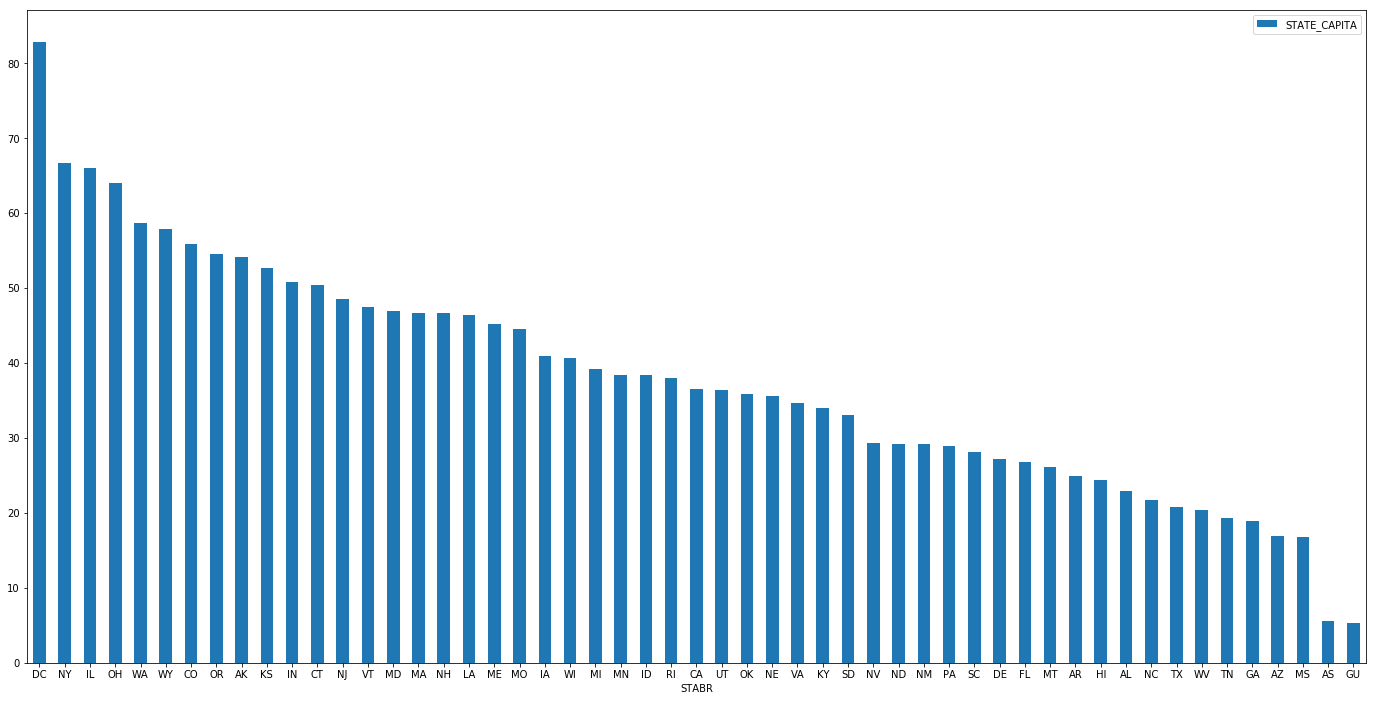

In [ ]:
ax1 = state.sort_values('STATE_CAPITA', ascending = False).plot.bar(x = 'STABR', y='STATE_CAPITA', rot='0', figsize=(24,12))

In [ ]:
ax2 = go.Figure(data = go.Choropleth(
    locations = state['STABR'], # Spatial coordinates
    z = state['STATE_CAPITA'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'aggrnyl',
    colorbar_title = "Per Capita Expenditures",
))

ax2.update_layout(
    title_text = 'Per Capita Expenditures 2016',
    geo_scope='usa', # limite map scope to USA
)

ax2.show()